In [1]:
import time
import json
import multiprocessing

import llama_cpp
from huggingface_hub import hf_hub_download
import numpy as np

np.int = int

from skopt.space import Integer, Categorical


new_model_name = "lmstudio-community/gemma-2-27b-it-GGUF"
new_model_file = "gemma-2-27b-it-Q6_K.gguf"
MODEL_PATH = hf_hub_download(new_model_name, filename=new_model_file)

# Hyperparameters
space = [
    Categorical([True, False], name="f16_kv"),
    Categorical([True, False], name="use_mlock"),
    Integer(1, multiprocessing.cpu_count(), name="n_threads"),
    Integer(0, 100, name="n_gpu_layers"),
]

# TODO: Make this a random prompt to avoid any cache related inconsistencies
PROMPT = """You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}
    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.
    You should generate only the question. The language should be {lang_dict[lang]}. 
"""

from skopt.utils import use_named_args


@use_named_args(space)
def objective(**params):
    f16_kv = params["f16_kv"]
    use_mlock = params["use_mlock"]
    n_threads = params["n_threads"]
    n_batch = params["n_gpu_layers"]
    llm = llama_cpp.Llama(
        model_path=MODEL_PATH,
        f16_kv=f16_kv,
        use_mlock=use_mlock,
        n_threads=n_threads,
        n_gpu_layers=n_batch,
    )

    t1 = time.time()
    output = llm(
        PROMPT,
        max_tokens=4096,  # Only optimize prompt processing
        stop=["###", "\n"],
        echo=True,
    )
    t2 = time.time()

    print(json.dumps(output, indent=2))
    print(f"Time: {t2 - t1} seconds")
    print(f"Time per token: {(t2 - t1) / output['usage']['total_tokens']} seconds")

    return (t2 - t1) / output["usage"]["total_tokens"]

In [2]:
from skopt import gp_minimize

res = gp_minimize(objective, space)

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-10cedc90-f0ba-45ac-b077-2df7d8bd2730",
  "object": "text_completion",
  "created": 1723386023,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.869253158569336 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-58ce8d2e-c8ae-4c4e-aba7-c3b346fadf75",
  "object": "text_completion",
  "created": 1723386043,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.208917140960693 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-526fdd6b-12da-45f3-8656-3104f99f4627",
  "object": "text_completion",
  "created": 1723386064,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.942920446395874 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-dbfcfddc-60c1-47b7-81b9-b26725a89f55",
  "object": "text_completion",
  "created": 1723386083,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.429821252822876 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-3a152d1f-6aa9-440d-94ec-5dedda02df2a",
  "object": "text_completion",
  "created": 1723386103,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.568613529205322 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-56c4e09a-5bc4-4cfc-96f3-52620fc01289",
  "object": "text_completion",
  "created": 1723386122,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.47110342979431 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-bd195a87-e76b-4328-98c7-8ec7a7aa09b8",
  "object": "text_completion",
  "created": 1723386141,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.765340566635132 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-cb930256-00b4-48b0-b4b8-2e1e682a5831",
  "object": "text_completion",
  "created": 1723386161,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n{",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.544031143188477 seconds
Time per t

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-eef89955-22a9-4ec3-a65e-3adb45a81616",
  "object": "text_completion",
  "created": 1723386180,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.80823040008545 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-858d22de-f9b5-4c40-8f48-9f9a773f01b6",
  "object": "text_completion",
  "created": 1723386199,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.041451930999756 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-27cb5865-a382-4227-82bd-2accee5eed9d",
  "object": "text_completion",
  "created": 1723386219,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.004688501358032 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-63b32f16-59b1-48bf-ad00-e18f0232844e",
  "object": "text_completion",
  "created": 1723386239,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.496050596237183 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-3b3f919a-7754-4305-af4e-5b4e07ed3b1b",
  "object": "text_completion",
  "created": 1723386258,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.539721250534058 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-429d40e0-db76-4688-94c4-530f01358ec6",
  "object": "text_completion",
  "created": 1723386277,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.513822317123413 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-2f82ad72-db78-4a2c-b855-d2fa6ca5e3c4",
  "object": "text_completion",
  "created": 1723386298,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.82685875892639 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-d3d78109-d809-4cd7-9b42-85fc1e6d7787",
  "object": "text_completion",
  "created": 1723386318,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.494736433029175 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-35ff4f7a-2797-4ca9-8002-967284c9e205",
  "object": "text_completion",
  "created": 1723386338,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.513564348220825 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-172f926a-734e-4d9e-ae08-200aa90c0fea",
  "object": "text_completion",
  "created": 1723386357,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.022932291030884 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-5ee06e8f-efe7-4d9a-8583-f8d26f16db43",
  "object": "text_completion",
  "created": 1723386377,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 15.946713924407959 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-feb48149-883c-48cb-b827-cfb35f758f42",
  "object": "text_completion",
  "created": 1723386395,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.61321496963501 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-9bfd643c-f80f-4197-9ca4-b4dba1d9ff59",
  "object": "text_completion",
  "created": 1723386415,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 15.81565546989441 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-a9eae9d3-3903-4248-bc2c-9d5d64b8e5d7",
  "object": "text_completion",
  "created": 1723386433,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.711182594299316 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-a2c009a5-153b-40c5-b8c6-31760c5b44fb",
  "object": "text_completion",
  "created": 1723386453,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n{",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 15.84836459159851 seconds
Time per to

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-9f48ba76-435b-47ac-b61e-789552000f5a",
  "object": "text_completion",
  "created": 1723386472,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.048725605010986 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-00471472-2a30-4fb8-9601-52b2870d8bf2",
  "object": "text_completion",
  "created": 1723386491,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 15.861162185668945 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f9a9d656-73e4-4c06-aa74-75767b7f2e9f",
  "object": "text_completion",
  "created": 1723386509,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 15.957979679107666 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-b24dd37d-7182-45db-9e41-f5bdb48bf584",
  "object": "text_completion",
  "created": 1723386528,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n{",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.460307598114014 seconds
Time per t

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-509277a2-1b49-4a5a-8606-62efa3061cfa",
  "object": "text_completion",
  "created": 1723386547,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 19.34366726875305 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-0ca1f8b0-0366-4db7-b582-5c5ce43113de",
  "object": "text_completion",
  "created": 1723386570,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.95613169670105 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-3a629c98-1eaa-410b-accb-a62a2816cbae",
  "object": "text_completion",
  "created": 1723386589,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.61188554763794 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-49b5a05d-f0cb-4dfb-86f1-cbf2ac557eb3",
  "object": "text_completion",
  "created": 1723386609,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 17.605708837509155 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f0e5d3d5-9bca-416b-be4c-6d2dfcc7011d",
  "object": "text_completion",
  "created": 1723386629,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.888418674468994 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-8db4a892-83d8-4d4c-b8bc-4a45b29c7347",
  "object": "text_completion",
  "created": 1723386649,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.363523960113525 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-79ca9163-6e58-4622-b384-e8a2868f2c0e",
  "object": "text_completion",
  "created": 1723386668,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.16413402557373 seconds
Time per

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-c7dbd7df-27da-4706-ba92-f3ca93ddf551",
  "object": "text_completion",
  "created": 1723386688,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.32562780380249 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-0f83e621-1277-4f41-af1d-5a1f20543cee",
  "object": "text_completion",
  "created": 1723386707,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.22873067855835 seconds
Time per

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-0bcaad5d-661b-484e-bbc3-04c3807e8254",
  "object": "text_completion",
  "created": 1723386726,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.6651132106781 seconds
Time per token:

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-ed6ab6cb-ea6e-4ae5-827e-1ac6423d61d1",
  "object": "text_completion",
  "created": 1723386746,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.787624835968018 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-9bb973c2-7f9c-406f-816f-26c9bbb34e4b",
  "object": "text_completion",
  "created": 1723386765,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.83564853668213 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-ce1d5038-91f9-4568-8dcc-d1d5a1878537",
  "object": "text_completion",
  "created": 1723386785,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.44368290901184 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-d3a7963d-6bb3-4e99-b542-566ff57d8747",
  "object": "text_completion",
  "created": 1723386805,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.874085664749146 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-1ab44f9a-2fa3-4b45-9469-6ff02329e633",
  "object": "text_completion",
  "created": 1723386824,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.99185061454773 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f66f7347-a43e-43fa-a3ff-f1b217f171c5",
  "object": "text_completion",
  "created": 1723386845,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.217299222946167 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-85c19bc9-6804-4a8d-882a-a39a98ce819d",
  "object": "text_completion",
  "created": 1723386865,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.120941877365112 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-2f27c75c-1fd6-48f2-97e3-f3ec0e5e010b",
  "object": "text_completion",
  "created": 1723386885,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.71285128593445 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-d2ee55df-e120-4cb9-815e-bf0e57f65f72",
  "object": "text_completion",
  "created": 1723386905,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.251502752304077 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-a00790c0-02db-4110-b54c-262222d68add",
  "object": "text_completion",
  "created": 1723386924,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.419822454452515 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-e9d4a26b-4156-42a1-9454-e279ae3b6dee",
  "object": "text_completion",
  "created": 1723386943,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 17.887340784072876 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-88a072f4-9231-4052-86d2-5e2a4cace65c",
  "object": "text_completion",
  "created": 1723386964,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.090564966201782 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-98712d2e-c91d-48b4-a5ca-75abac6078d5",
  "object": "text_completion",
  "created": 1723386985,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.212040662765503 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-2c8deb4f-1f05-4cce-9517-6e547d91bf42",
  "object": "text_completion",
  "created": 1723387006,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.527761459350586 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-807376db-dab2-4012-a182-23ed235a2f0f",
  "object": "text_completion",
  "created": 1723387028,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.479220628738403 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-b7da0d09-43a5-466e-8e85-7e9c16b2a668",
  "object": "text_completion",
  "created": 1723387049,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.888970375061035 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-72c67c5f-b5ae-46b4-8a17-d5e7f4f11c41",
  "object": "text_completion",
  "created": 1723387068,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n{",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.316274166107178 seconds
Time per t

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-ba8b35bc-b055-4ec8-b9ef-72a4802acbd1",
  "object": "text_completion",
  "created": 1723387088,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.864640951156616 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-65799274-b9dd-4607-80b3-c9a4e279d4c1",
  "object": "text_completion",
  "created": 1723387110,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.391558170318604 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-faca2897-978e-4cb8-8348-dc5c2950724c",
  "object": "text_completion",
  "created": 1723387129,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.574123859405518 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f3b8b7c9-edb7-4edb-acb2-28b84a0a19f3",
  "object": "text_completion",
  "created": 1723387150,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.61147141456604 seconds
Time per

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-b1401cc2-68f7-4eda-8efe-896b0a3b5fbf",
  "object": "text_completion",
  "created": 1723387169,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.501762866973877 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-82c8377d-fd0b-4866-8ff5-e18cb6559449",
  "object": "text_completion",
  "created": 1723387189,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.00332999229431 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-e8dd2c17-b575-496a-8cae-47a642b3e379",
  "object": "text_completion",
  "created": 1723387210,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.32512140274048 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f22d8939-95c1-4a6e-be70-57547cd19a53",
  "object": "text_completion",
  "created": 1723387230,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.565471649169922 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-3ff766ca-90b8-4ae1-b421-5c1ad8ab27ff",
  "object": "text_completion",
  "created": 1723387252,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 17.525375843048096 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-3679e61b-d6f8-4c4a-b8a3-b47736c459b3",
  "object": "text_completion",
  "created": 1723387273,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.826493978500366 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-dd619faa-b8dd-420a-ba90-06eee6385fd9",
  "object": "text_completion",
  "created": 1723387294,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.10205841064453 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-c07499b7-8ccf-486e-a1f6-257f3437ee0a",
  "object": "text_completion",
  "created": 1723387314,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.694769382476807 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-663be591-ca80-4316-b0aa-94601a9ccd26",
  "object": "text_completion",
  "created": 1723387333,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.118582248687744 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-dafefd00-ae47-4d6f-bb1d-acc0d2cfb4d5",
  "object": "text_completion",
  "created": 1723387354,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.38741421699524 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-1bc306b1-78db-4f2b-bd3a-95227b37ee1e",
  "object": "text_completion",
  "created": 1723387374,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.821226358413696 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-37e8fe3b-b959-4db4-8e2f-54f684b38aa1",
  "object": "text_completion",
  "created": 1723387394,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.745174407958984 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-2c5b6409-5aa5-476e-bff5-9fd4fe9db35d",
  "object": "text_completion",
  "created": 1723387414,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.233450174331665 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-252e8b99-adef-4bef-ba9c-1c0b1ff27677",
  "object": "text_completion",
  "created": 1723387435,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.823384284973145 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-1976e5ca-024b-4674-9183-0ea113cc5458",
  "object": "text_completion",
  "created": 1723387456,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n```",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.846423149108887 seconds
Time per

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f2929861-4e5d-4781-a6dd-1e5861f0b37e",
  "object": "text_completion",
  "created": 1723387476,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.624976634979248 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-d4589f76-4ff1-416c-bc58-e31ab759ff6d",
  "object": "text_completion",
  "created": 1723387496,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.404369592666626 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-408a8b74-8053-4e6e-b76b-f20da4d18fe9",
  "object": "text_completion",
  "created": 1723387516,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.619630813598633 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-a0903178-0f01-493a-97c9-5fd529c80882",
  "object": "text_completion",
  "created": 1723387536,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.18335795402527 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-2bd6cfac-921e-4508-83a5-c6f7e3e2b78d",
  "object": "text_completion",
  "created": 1723387556,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 17.530291080474854 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-9706aa03-0251-40c1-b3c2-7478e42d5de0",
  "object": "text_completion",
  "created": 1723387577,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.303733348846436 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-b4d7569d-efc9-417a-b914-9a9277863a91",
  "object": "text_completion",
  "created": 1723387598,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.662243366241455 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-7ce4e343-3ba2-4f7e-b033-98d825372cf4",
  "object": "text_completion",
  "created": 1723387619,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 17.710264444351196 seconds
Time pe

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-de8e4093-b48b-4223-bd71-d7a204638bc6",
  "object": "text_completion",
  "created": 1723387640,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.776880264282227 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-f2bea60a-6607-4139-b3e1-f1a23e5414fc",
  "object": "text_completion",
  "created": 1723387660,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.836820125579834 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-4dd2a21b-4c56-4f8e-879d-fb62819bbcbe",
  "object": "text_completion",
  "created": 1723387682,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.282302379608154 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-261aafb0-7382-44ee-9470-63fd55fdf631",
  "object": "text_completion",
  "created": 1723387702,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.273083686828613 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-e0694744-98ca-49c1-9d7b-52bffd9d6830",
  "object": "text_completion",
  "created": 1723387723,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 17.056190490722656 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-fba81044-843a-4047-8605-cf36e2fd3247",
  "object": "text_completion",
  "created": 1723387743,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.86140203475952 seconds
Time per token

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-8a013023-a58f-4e09-bc0c-867d8f7d2d69",
  "object": "text_completion",
  "created": 1723387763,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.240634202957153 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-53e9a652-ff31-4719-9e21-b65e5ec0c136",
  "object": "text_completion",
  "created": 1723387783,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n```",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.757706880569458 seconds
Time per

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-db052802-752a-4818-b61a-41b182d1828c",
  "object": "text_completion",
  "created": 1723387803,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n    ",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.76793122291565 seconds
Time per

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-8728daca-5fb3-4899-9e3d-5585425c78eb",
  "object": "text_completion",
  "created": 1723387822,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.2621910572052 seconds
Time per token:

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-561ed21f-5d63-4e58-9f27-81240b294139",
  "object": "text_completion",
  "created": 1723387842,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.255987882614136 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-ade16138-028c-475c-86c9-d9e022e13317",
  "object": "text_completion",
  "created": 1723387862,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n{",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.67336082458496 seconds
Time per to

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-0b784a73-b712-41c8-b9c1-166900cd8d10",
  "object": "text_completion",
  "created": 1723387882,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 18.269050359725952 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-5673011b-ebc0-4f76-b069-ff954f179983",
  "object": "text_completion",
  "created": 1723387903,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.144578218460083 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-0b2bd1eb-05e7-446e-a9ce-53a8cf04159c",
  "object": "text_completion",
  "created": 1723387923,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.165908813476562 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-00b51fd3-e8e6-4f17-847e-7fa63c1f730c",
  "object": "text_completion",
  "created": 1723387942,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.301360607147217 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-24619843-ebb9-44b8-86d6-0a2b2aa37e72",
  "object": "text_completion",
  "created": 1723387962,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.753884077072144 seconds
Time per toke

/home/hellstrom/folder/autoencoders/venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, True, 1, 100] before, using random point [False, False, 11, 57]
  warnings.warn(
llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32   

{
  "id": "cmpl-9ff29a69-fccb-43e5-a636-5042dc012bdf",
  "object": "text_completion",
  "created": 1723387982,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 0,
    "total_tokens": 95
  }
}
Time: 16.030988693237305 seconds
Time per toke

llama_model_loader: loaded meta data with 33 key-value pairs and 508 tensors from /home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = gemma2
llama_model_loader: - kv   1:                               general.name str              = gemma-2-27b-it
llama_model_loader: - kv   2:                      gemma2.context_length u32              = 8192
llama_model_loader: - kv   3:                    gemma2.embedding_length u32              = 4608
llama_model_loader: - kv   4:                         gemma2.block_count u32              = 46
llama_model_loader: - kv   5:                 gemma2.feed_forward_length u32              = 36864
llama_model_loader: - kv   6:        

{
  "id": "cmpl-3718cf9d-8b7a-4736-b340-8cf82853aa5f",
  "object": "text_completion",
  "created": 1723388002,
  "model": "/home/hellstrom/.cache/huggingface/hub/models--lmstudio-community--gemma-2-27b-it-GGUF/snapshots/8f63ea1cfc5ce646813257d8f5d5a1afa82af58f/gemma-2-27b-it-Q6_K.gguf",
  "choices": [
    {
      "text": "You are conducting an interview for the position of {role}. Job description: {requirements}. {history_text}\n    Your task is to generate the next question so that it best fits the job description and assesses the interviewee's competencies in the most critical areas. The question should have a clear answer and focus solely on algorithms and data structures.\n    You should generate only the question. The language should be {lang_dict[lang]}. \n{",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 95,
    "completion_tokens": 1,
    "total_tokens": 96
  }
}
Time: 16.081121921539307 seconds
Time per t

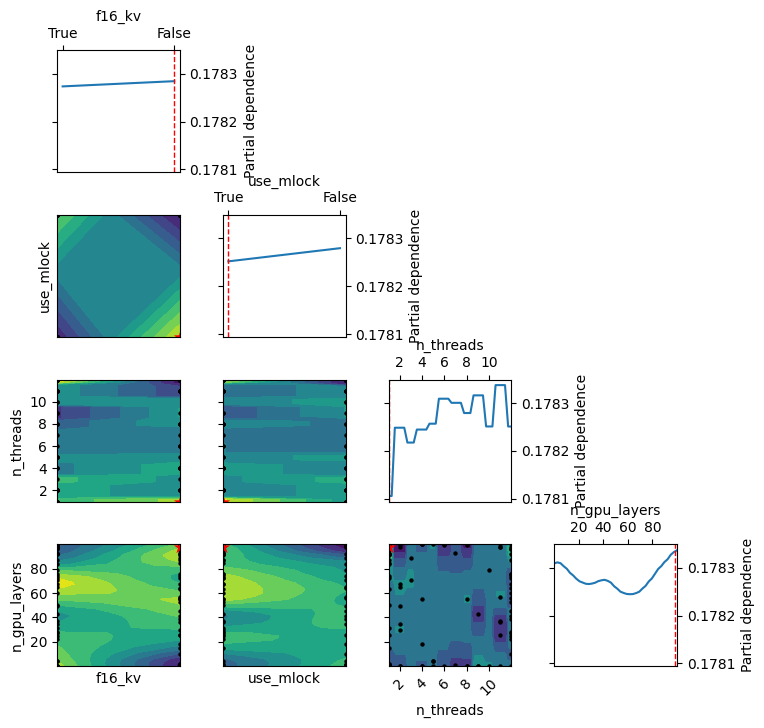

In [3]:
import matplotlib.pyplot as plt
from skopt.plots import plot_objective

plot_objective(res)
plt.show()

In [4]:
res

          fun: 0.1650871311624845
            x: [False, True, 1, 98]
    func_vals: [ 1.881e-01  1.917e-01 ...  1.687e-01  1.675e-01]
      x_iters: [[False, False, 11, 26], [True, True, 9, 43], [True, False, 2, 49], [True, True, 5, 4], [False, False, 5, 0], [False, True, 4, 55], [True, False, 5, 4], [True, False, 12, 92], [False, False, 3, 89], [True, True, 11, 37], [True, False, 10, 79], [False, True, 8, 55], [False, True, 12, 53], [True, False, 11, 98], [False, True, 1, 2], [True, True, 12, 60], [False, True, 12, 67], [False, False, 4, 18], [True, True, 1, 72], [False, True, 12, 76], [True, True, 12, 27], [True, True, 12, 22], [False, True, 1, 98], [False, True, 1, 93], [True, True, 12, 96], [True, True, 11, 100], [False, True, 2, 30], [True, True, 1, 87], [False, False, 12, 64], [True, True, 2, 67], [False, True, 12, 87], [True, True, 1, 31], [False, True, 12, 96], [True, True, 1, 97], [True, True, 12, 76], [False, False, 12, 39], [False, True, 1, 26], [False, True, 1, 100], [Fals